# CSCI4022 Homework 5; Graphs and A-Priori

## Due Monday, March 29 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems, except the **form of your output for #3**.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import itertools
import csv


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Practice: A-Priori; 25 pts) 

Consider the Online Retail data set provided in `onlineretail.csv`.  This includes over 500,000 purchases from an online retailer.

We want to use the baskets (marked by `InvoiceNo`) and the items (marked by `StockCode` and/or `Description`) to perform an item basket analysis.

This data set is small enough to run directly from main memory, so you may do that if you wish.  You may also complete this problem using only the first 100,000 entries of the .csv if you wish for shorter computational time.  Be very explicit which you are using.

#### a)  There are some odd entries in the data set.  Make sure that you're discarding any transactions and items with no `Description`, non-positive `Quantity`, or non-positive `Unit Price`.


Note: I'm using only the first 100,00 entries of the .csv for shorter computational time.

In [34]:
df = pd.read_csv('/users/tamer/desktop/advanced_ds/data/onlineretail.csv',nrows=100000,names = ['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'],encoding='latin1')  
#drop colums we dont need
df = df.drop(columns = ['InvoiceDate','CustomerID','Country'])
#replace empty values in description to nan
df['Description'] = df['Description'].replace('',np.NaN,regex=True)
#if stockcode value contain letter, replace with nan
df['StockCode'] = df['StockCode'].replace('[^0-9]',np.NaN,regex=True)
#convert string numbers to numeric value so we can play with them.
df['Quantity']= pd.to_numeric(df['Quantity'],errors='coerce')
df['UnitPrice']= pd.to_numeric(df['UnitPrice'],errors='coerce')
##replace any negative value with a nan
df['Quantity'] = df['Quantity'].loc[df['Quantity'] > 0.0]
df['UnitPrice'] = df['UnitPrice'].loc[df['UnitPrice'] > 0.0]
# drop nans
df = df.dropna()
print("Number of rows=",len(df))
df.head(50)

Number of rows= 84562


,InvoiceNo,StockCode,Description,Quantity,UnitPrice
2,536365,71053,WHITE METAL LANTERN,6.0,3.39
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,7.65
7,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,4.25
8,536366,22633,HAND WARMER UNION JACK,6.0,1.85
9,536366,22632,HAND WARMER RED POLKA DOT,6.0,1.85
10,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,1.69
11,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,2.10
12,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6.0,2.10
13,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8.0,3.75
14,536367,22310,IVORY KNITTED MUG COSY,6.0,1.65




#### b) For our first iteration, we will use just `StockCode` for the items.  Use `StockCode` to create a table of frequent single items at 1% support threshold.  For convenience on this part of the problem and part c), you may choose to discard all items with non-integer values in `StockCode`.  Was 1% an appropriate support threshold?  Describe why or why not.


In [35]:
#Create a dictionary where each value is a basket and its key is a list of items in that basket.
baskets = {}
for i in df['InvoiceNo']:
    if i not in baskets:
        lst =[]
        lst = (df[df['InvoiceNo']==i]['StockCode']).tolist() #return all stockcode where invoice = i
        baskets.update({i:lst})
basket_count = len(baskets) #equals 3449

In [36]:
single_item_count = {}
one_percent = basket_count * (1/100) #one percent of basket count rounded up to an integer
#loop over items, count unique items, and save them in dictionary as {item:count}
for i in df['StockCode']:
    if i not in single_item_count:
        single_item_count.update({i:1})
    elif i in single_item_count:
        single_item_count[i] = single_item_count[i] +1

#Using the single_item_count which hold the count of all times, find those items that are frequent.
frequent_item = {}
for i in single_item_count:
    if single_item_count[i]> one_percent:
        frequent_item.update({i:single_item_count[i]})



#### c) Use A-priori to find all frequent  pairs of items from your set of frequent items in a).  Use whatever support threshold you feel is most appropriate.


In [37]:
#Use combinations on frequent item list constructed above to construct a list of all possible item pair. 
pair = list(itertools.combinations(frequent_item,2))
pair_len = len(pair)


In [38]:
item_pair_count = {}
new_baskets = {}
#Count each and every pair of items.
for x in range(pair_len):
    count = 0
    for i in baskets:
        #if both items are in the same basket then count++ 
        #and create new dictionary to hold those baskets that contain frequent pair
        if(pair[x][0] in baskets[i]):
            if(pair[x][1] in baskets[i]):
                new_baskets.update({i:baskets[i]})
                count = count + 1
    item_pair_count.update({pair[x]:count})


In [39]:
frequent_item_pair = {}
#threshold of 70 work nicely
for i in item_pair_count:
    if item_pair_count[i] > 70:
        frequent_item_pair.update({i:item_pair_count[i]})
print(frequent_item_pair)

{('22745', '22748'): 80, ('21754', '21755'): 84, ('22960', '22961'): 149, ('22960', '22969'): 72, ('22960', '22722'): 84, ('22960', '22720'): 109, ('22728', '22727'): 87, ('22728', '22726'): 87, ('22727', '22726'): 133, ('22727', '22729'): 72, ('22726', '22729'): 78, ('22629', '22630'): 98, ('22086', '22910'): 91, ('22386', '21931'): 77, ('20725', '22469'): 74, ('20725', '22197'): 80, ('20725', '22382'): 78, ('20725', '20726'): 72, ('20725', '22383'): 96, ('20725', '20727'): 74, ('21212', '21977'): 89, ('21212', '84991'): 99, ('21212', '22961'): 81, ('21212', '21080'): 71, ('21212', '84992'): 72, ('21212', '22423'): 80, ('21977', '84992'): 71, ('21931', '22411'): 81, ('21931', '20713'): 86, ('21931', '20712'): 75, ('22961', '22469'): 78, ('22961', '22969'): 76, ('22961', '22197'): 79, ('22961', '22423'): 88, ('22961', '22666'): 84, ('22961', '22722'): 83, ('22961', '22720'): 98, ('21166', '21175'): 78, ('21166', '85152'): 74, ('21166', '21181'): 88, ('21175', '21181'): 85, ('22457', '2


#### d) Use a hash table to hash items from their `Descriptions`.  Include a check to minimize and fix any collisions, as in nb08.


In [40]:
#hash function
p = 2251
lookup = [False]*p  # using -1 as the fill-value since 0 could be an index, or False
def hashfcn(itemname, p):
    # sum up the ASCII values in the string itemname
    tot = np.sum([ord(c) for c in itemname])
    # mod down by the prime p
    hv = tot%p
    return hv 

In [41]:
# Hash each item description, 
#each hash value will be a key in array where each element in a tuple ( description, unique integer)
cnt = 0
for item in df['Description']:
    p = 2251
    hv = hashfcn(item,p)
    if not lookup[hv]:
        # if the slot is free, put the (item, index) pair there
        lookup[hv] = [(item, cnt)]
        # and increment the index counter
        cnt += 1
    else:
        # if the slot is taken, check if the element there is the one we want
        items = [lookup[hv][k][0] for k in range(len(lookup[hv]))]
        if item in items:
            pass
        else:
            # resolve collision but appending to list
            lookup[hv].append((item,cnt))
            cnt+=1
print(cnt)

2208



#### e) Use A-priori to find all frequent items and all frequent pairs of items from your hashed data set in part c).



In [42]:
single_count =[0]*p #array to hold count of single items
baskets = {}
for basket in df['InvoiceNo']:
    if basket not in baskets:
        items_in_basket =[]
        items_in_basket = (df[df['InvoiceNo']==basket]['Description']).tolist() 
        for item in items_in_basket:
            hv=hashfcn(item,p)
            for k in lookup[hv]:
                if(item == k[0]):
                    single_count[k[1]] =single_count[k[1]] + 1
        baskets.update({basket:items_in_basket})
        
basket_count = len(baskets) #equals 3449
print(single_count)


[73, 117, 49, 98, 18, 244, 111, 116, 92, 35, 66, 49, 64, 216, 187, 6, 116, 277, 38, 35, 55, 82, 152, 206, 209, 21, 68, 57, 106, 117, 134, 187, 183, 86, 60, 163, 144, 36, 27, 41, 69, 185, 75, 96, 78, 76, 73, 129, 125, 194, 81, 96, 220, 188, 70, 105, 89, 261, 112, 99, 263, 101, 163, 174, 204, 141, 320, 98, 1, 190, 43, 96, 41, 77, 9, 52, 88, 95, 86, 167, 166, 127, 44, 36, 57, 76, 91, 58, 103, 32, 35, 53, 52, 108, 72, 61, 171, 91, 59, 102, 57, 51, 24, 147, 68, 66, 17, 293, 383, 297, 39, 50, 116, 78, 29, 84, 52, 34, 94, 18, 186, 28, 30, 43, 66, 56, 50, 47, 24, 173, 18, 33, 34, 58, 30, 77, 57, 72, 133, 155, 107, 92, 86, 147, 36, 261, 86, 208, 79, 49, 90, 222, 97, 85, 72, 76, 110, 8, 15, 16, 150, 16, 45, 66, 92, 87, 73, 25, 183, 143, 124, 57, 137, 140, 102, 109, 126, 19, 66, 49, 42, 86, 186, 59, 40, 163, 215, 170, 236, 84, 29, 18, 123, 47, 76, 11, 78, 58, 60, 57, 31, 27, 1, 136, 44, 45, 138, 57, 74, 88, 61, 47, 69, 70, 40, 26, 83, 83, 71, 65, 27, 25, 14, 41, 18, 21, 154, 72, 162, 144, 141, 13

In [43]:
one_percent = round(basket_count *(1/ 100))
frequent_single=[] #holds item description of frequent items
for i in range(len(single_count)):
    if(one_percent < single_count[i]):
        for k in lookup:
            if k !=False:
                for j in k:
                    if j[1] == i:
                        frequent_single.append(j[0])

    else:
        single_count[i] = -1

print(len(frequent_single))

843


In [44]:
#double=[[0]*p]*p
pair_count = {}

#print(pair_count)
pairs = list(itertools.combinations(frequent_single,2)) #list of all possible frequent pair
for basket in baskets:
    for pair in pairs:
        if pair[0] and pair[1] in baskets[basket]:
            #get the pair's hash values
            first_hv = hashfcn(pair[0],p)
            second_hv = hashfcn(pair[1],p)
            #use hash values to look up the items' unique integer value (index in pair_count dictionary)
            for k in lookup[first_hv]:
                if(pair[0] == k[0]):
                    first_index = k[1]
                
            for k in lookup[second_hv]:
                if(pair[1] == k[0]):
                    second_index = k[1]
                
            j= max(first_index,second_index)
            i= min(first_index,second_index)
            
            if((i,j) not in pair_count):
               pair_count.update({(i,j):1})
            
            elif((i,j) in pair_count):
                pair_count[(i,j)] +=1

#print(pair_count)

{}


In [46]:
frequent_pair=[]
for i in pair_count:
    if pair_count[i] > 400:
        frequent_pair.append([i,pair_count[i]])
print(frequent_pair)

[[(0, 467), 410], [(1, 467), 410], [(2, 467), 410], [(3, 467), 410], [(5, 467), 410], [(6, 467), 410], [(7, 467), 410], [(8, 467), 410], [(9, 467), 410], [(10, 467), 410], [(11, 467), 410], [(12, 467), 410], [(13, 467), 410], [(14, 467), 410], [(16, 467), 410], [(17, 467), 410], [(18, 467), 410], [(19, 467), 410], [(20, 467), 410], [(21, 467), 410], [(22, 467), 410], [(23, 467), 410], [(24, 467), 410], [(26, 467), 410], [(27, 467), 410], [(28, 467), 410], [(29, 467), 410], [(30, 467), 410], [(31, 467), 410], [(32, 467), 410], [(33, 467), 410], [(34, 467), 410], [(35, 467), 410], [(36, 467), 410], [(37, 467), 410], [(39, 467), 410], [(40, 467), 410], [(41, 467), 410], [(42, 467), 410], [(43, 467), 410], [(44, 467), 410], [(45, 467), 410], [(46, 467), 410], [(47, 467), 410], [(48, 467), 410], [(49, 467), 410], [(50, 467), 410], [(51, 467), 410], [(52, 467), 410], [(53, 467), 410], [(54, 467), 410], [(55, 467), 410], [(56, 467), 410], [(57, 467), 410], [(58, 467), 410], [(59, 467), 410], 

#### f) Did any frequent items appear in part e) that did not in part c)?  If so, list them.

I got way more frequent item pairs in part d than in part b. I used pretty much the same method of double looping over baskets then over all possible frequent item pair then as if the pair is in the baskket and increment. 


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Directed Graphs; 20 pts) 

Suppose our graph is a chain of $n$ nodes, as shown below.  

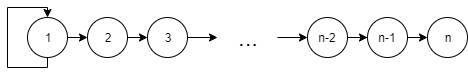

#### a) Set up a small experiment where you implement Hubs and Authorities on a graph of this form for a *specific* value of $n$, such as $n=6$.  Run the algorithm the "max-element equals 1" normalization, and use a convergence check using the max-norm ($L_\infty$) and a tolerance of $10^{-6}$.  Print the final Hubs and Authorities scores and how many iterations were run until convergence.

In [8]:
L = np.array([[1,1,0,0,0,0],
             [0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,0,1,0],
             [0,0,0,0,0,1],
             [0,0,0,0,0,0]])

AT = np.array([[0,1,0,0,1,1],
             [1,0,0,0,0,0],
             [0,1,0,0,0,1],
             [0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,1,1,0]])
A = np.array([[0,1,0,0,0,0],
             [1,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,0,1,1],
             [1,0,0,0,0,1],
             [1,0,1,0,0,0]])
LT= np.transpose(L)
print(L)
print(LT)

[[1 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]


In [17]:
a = np.array([1,1/3,2/3,1/3,1/3,2/3])
print(a)
print(np.matmul(A,a))


[1.         0.33333333 0.66666667 0.33333333 0.33333333 0.66666667]
[0.33333333 1.66666667 0.33333333 1.         1.66666667 1.66666667]


In [3]:
def dist_Lmax(x,y):
    result=[]
    for i in range(len(x)):
        result.append(abs(x[i]-y[i]))
    return(max(result))

n = L.shape[0]
print(n)
hub = np.ones(n)
print("-----")
print(hub)
aut = np.ones(n)
tol = 0.000001

hub_old = np.zeros(n)
aut_old = np.zeros(n)
max_change = np.max([dist_Lmax(hub,hub_old), dist_Lmax(aut,aut_old)])
counter = 0
while max_change > tol:
    aut_old = aut
    hub_old = hub
    aut = np.matmul(LT, hub)
    aut = aut/np.max(aut)
    hub = np.matmul(L, aut)
    hub = hub/np.max(hub)
    max_change = np.max([dist_Lmax(hub,hub_old), dist_Lmax(aut,aut_old)])
    counter = counter + 1
    
    print("Authority scores: ", np.round(aut,4))
    print("Hub scores: ", np.round(hub,4))
print("Number of iterations:", counter)

6
-----
[1. 1. 1. 1. 1. 1.]
Authority scores:  [1. 1. 1. 1. 1. 1.]
Hub scores:  [1.  0.5 0.5 0.5 0.5 0. ]
Authority scores:  [1.  1.  0.5 0.5 0.5 0.5]
Hub scores:  [1.   0.25 0.25 0.25 0.25 0.  ]
Authority scores:  [1.   1.   0.25 0.25 0.25 0.25]
Hub scores:  [1.    0.125 0.125 0.125 0.125 0.   ]
Authority scores:  [1.    1.    0.125 0.125 0.125 0.125]
Hub scores:  [1.     0.0625 0.0625 0.0625 0.0625 0.    ]
Authority scores:  [1.     1.     0.0625 0.0625 0.0625 0.0625]
Hub scores:  [1.     0.0312 0.0312 0.0312 0.0312 0.    ]
Authority scores:  [1.     1.     0.0312 0.0312 0.0312 0.0312]
Hub scores:  [1.     0.0156 0.0156 0.0156 0.0156 0.    ]
Authority scores:  [1.     1.     0.0156 0.0156 0.0156 0.0156]
Hub scores:  [1.     0.0078 0.0078 0.0078 0.0078 0.    ]
Authority scores:  [1.     1.     0.0078 0.0078 0.0078 0.0078]
Hub scores:  [1.     0.0039 0.0039 0.0039 0.0039 0.    ]
Authority scores:  [1.     1.     0.0039 0.0039 0.0039 0.0039]
Hub scores:  [1.    0.002 0.002 0.002 0.002 0

#### b) Set up the system of equations that represent taking one step of the HITS algorithm.  In other words, use markdown to explicitly state what $A^{new}$ will be as a function of $H^{old}$, and $H^{new}$ as a function of $A^{old}$.   I suggest you use your code from a) to check your work!

$H_{new}$ = L $A_{old}$:
$$\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\  
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1\\ 1\\ 1\\1 \\1 \end{bmatrix}=\begin{bmatrix} 2 \\ 1\\ 1\\ 1\\1 \\0 \end{bmatrix}$$
Now we need to normalize by diving the resulting vector by the max element

$$\begin{bmatrix} 2 \\ 1\\ 1\\ 1\\1 \\0 \end{bmatrix} / 2 = \begin{bmatrix} 1 \\ .5\\ .5\\ .5\\.5 \\0 \end{bmatrix}$$


$A_{new}$ = $L^{T}$$H_{old}$ :

$$\begin{bmatrix}
1 &0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0\\  
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1\\ 1\\ 1\\1 \\1 \end{bmatrix}=\begin{bmatrix} 1 \\ 1\\ 1\\ 1\\1 \\1 \end{bmatrix}$$

Now we need to normalize by diving the resulting vector by the max element 


$$\begin{bmatrix} 1 \\ 1\\ 1\\ 1\\1 \\1 \end{bmatrix} / 1 = \begin{bmatrix} 1 \\ 1\\ 1\\ 1\\1 \\1 \end{bmatrix}$$


#### c) What will be the exact values of $A^{new}_j$ and $H^{new}_j$ resulting from the $j$th pass through the HITS algorithm, after normalization?

${A_j}^{new} = \dfrac{L^{T} {H_j}^{old}}{max({A_j}^{new})}$

${H_j}^{new} = \dfrac{L {A_j}^{old}}{max({H_j}^{new})}$

#### d) Your code in a) should have converged to the thereotical result from taking the *limit* (after many iterations) of the argument you constructed in c).  *Exactly* how many steps did it take until you converged?  Is this consistent with the theoretical result in part b?

It took 21 steps for my result to converge. It is consistent with the theoretical result.